## Classification Models Project 

In [23]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


### Clasifcation Model using our Real Estate Data
I am going to use logistic regression classification model to predict the probability of a house being more expensive than the mean of our list of houses. For the real estate dataset, the mean price of homes is 37.980 per unit. I am going to use the transaction date, the house age, distance to metro stations, and number of conviencience stores to predict the probability of a house being more expensive than `meanPrice` of homes. After creating a logistic model and creating a confusion matrix, we resulted a test error of 16.9%. In other words, our model predicted correctly 83.1% of the time if a home was more expensive than the `meanPrice` of homes. 

In [24]:
#classifcation model on our own real estate dataset

#read data
#data = pd.read_excel("C:\\Users\\Julian\\OneDrive\\Escuela\\Spring24\\CSC177\\Real estate valuation data set.xlsx")
data = pd.read_excel("~/Documents/Datasets/RealEstateDataSet.xlsx")

#Using logistic regression, predict the probability of a house being more expensive than the mean of houses.
#get mean of all houses
meanPrice =data["Y house price of unit area"].mean()

#create a new column and as '1' if a house price is higher than the mean
data["AboveMean"] = (data["Y house price of unit area"] > meanPrice).astype(int)

#get our features
features = ["X1 transaction date", "X2 house age" , "X3 distance to the nearest MRT station" , "X4 number of convenience stores"]
target = "AboveMean"

#split data innto training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=40)

#create logistic model
model1 = LogisticRegression()

#traing the model 
model1.fit(X_train, y_train)

#make predictions based on test set
predictions1 = model1.predict(X_test)

#create confusion matrix 
confusionMatrix = confusion_matrix(y_test, predictions1)

#print the confusion matrix
print("Confusion matrix:\n" , confusionMatrix)

#get our test error
accuracy = accuracy_score(y_test, predictions1)
testError = 1 -accuracy
print("Test Error Rate:" , testError)


Confusion matrix:
 [[32  7]
 [ 7 37]]
Test Error Rate: 0.1686746987951807


### Clasifcation Model using Churning Data

I am going to also use a Logistic Regression model to predict the probability of losing a customer to churn (or the natural loss of customers over time). We will use "Exited" as our response variable; and "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", and "EstimatedSalary" as our Features. From the Test Error Rate, we can see our model guesses correctly about 80% of the time.

In [87]:
#Classification Model on Churn_Modelling dataset from Canvas
churnData = pd.read_csv('~/Documents/Datasets/Churn_Modelling.csv')

In [61]:
# Seperate out Response variables
churnResponse = 'Exited'

In [66]:
# Seperate out Features
churnFeatures =['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [83]:
# Seperate data for training and testing
churnXTrain, churnXTest, churnYTrain, churnYTest = train_test_split(churnData[churnFeatures], churnData[churnResponse].astype(bool), test_size=0.4, random_state=40)

[False False False ... False  True False]
Test Error Rate:  0.21350000000000002
[False False False ... False  True False]
Test Error Rate:  0.20725000000000005
[False False False ... False  True False]
Test Error Rate:  0.20550000000000002
[False False False ... False  True False]
Test Error Rate:  0.20450000000000002
[False False False ... False  True False]
Test Error Rate:  0.20475
[False False False ... False  True False]
Test Error Rate:  0.20475
[False False False ... False  True False]
Test Error Rate:  0.20425000000000004
[False False False ... False  True False]
Test Error Rate:  0.20399999999999996
[False False False ... False  True False]
Test Error Rate:  0.20499999999999996
[False False False ... False  True False]
Test Error Rate:  0.20450000000000002


Text(0, 0.5, 'Accuracy')

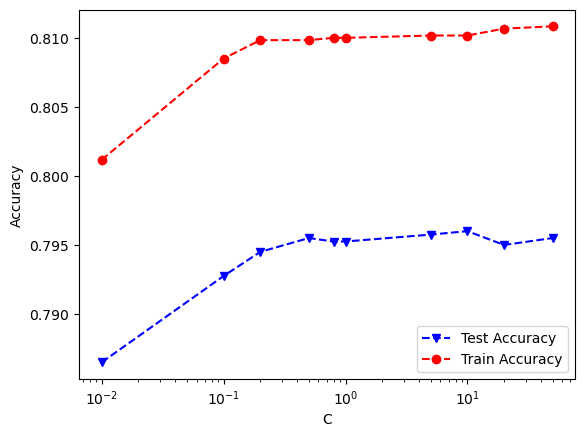

In [89]:
# Regularization Parameters, used to prevent overfitting by penalizing large coefficeints
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

# Initialize result lists
LRtestAcc = []
LRtrainAcc = []

# Train and evaluate model
for param in C:
    clf = LogisticRegression(C=param, max_iter=10000)
    clf.fit(churnXTrain,churnYTrain)
    log_reg_pred = clf.predict(churnXTest)
    log_reg_pred_train = clf.predict(churnXTrain)
    print(log_reg_pred)
    print("Test Error Rate: ", 1-accuracy_score(churnYTest, log_reg_pred))
    LRtestAcc.append(accuracy_score(churnYTest, log_reg_pred))
    LRtrainAcc.append(accuracy_score(churnYTrain,log_reg_pred_train))
    
    
# Display
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  